In [1]:
#第一步 引入需要的库
import numpy as np #for multidimensional matrices
import pandas as pd #for data analysis
import datetime #to work with dates and times
from bs4 import BeautifulSoup

#Other Relevant Libraries
import string
import collections
import io
#!pip install nltk
import nltk
#nltk.download('all')

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
#第二步 从指定路径读取爬取的数据
gotscrapeurl='/Users/yangxiaojun/test/erfan/twitter_data/lstm-data.csv'
df=pd.DataFrame(data=pd.read_csv(gotscrapeurl,header=0,sep=','))
df

,date,text
0,2019/11/1 23:59,$GE stock was down -2.99 %. Turned Positive 0....
1,2019/11/1 23:59,A day after he said the stock market was going...
2,2019/11/1 23:59,I don’t think he’s even Worth it to be remembe...
3,2019/11/1 23:59,"If the ScanEagle costs $3 million, well, buy B..."
4,2019/11/1 23:59,Bah en vrai imaginons qu’elle a pris le pantal...
...,...,...
34151219,2021-08-31 23:59:54,"comes stock with only 1 knob, the tone pot has..."
34151220,2021-08-31 23:59:58,Xbox Series S is now in stock at Amazon German...
34151221,2021-08-31 23:59:58,"Blackstone 36"" cooking stations with four burn..."
34151222,2021-08-31 23:59:59,"@RodrigoTorroba En un momento lo pensé, empecé..."


In [ ]:
#第三步 使用BeautifulSoup库对读取的twitter数据的text文件进行第一次清洗，删除文本中的网站信息，得到text_nohtml
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4', message='.*looks like a URL.*')
df['text_nohtml']=[BeautifulSoup(text, 'lxml').get_text() for text in df['text'].astype(str) ]

/usr/local/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/Ej4ZwAhTlO
!?stock?" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/2nUIShAeb5
※????:stock
???????:flow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/bs4/__init__.py:417: MarkupResemblesLocatorWarning: "https://t.co/zggqyGSIOd
思い出補正曲??
神奈川県上大岡ミラージュ10000枚
千葉県市原市マルハン12800枚
千葉県市原市ともえ13000枚
同一機種で三回も10000枚出せたのは吉宗だけでした?
爺でstock貯まったら姫しかchoiceしなかったwww??
#吉宗3" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use a

In [ ]:
#第四步 进行第二次清洗，对第一次处理完的数据text_nohtml进行第二次清洗，并仅保留想要的数据，清洗后的数据为cleancontent
# import string
def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    return df

# clear retweet identifiers in content, as well as URL's, then standardize the text
df['cleancontent'] = df['text_nohtml'].astype(str).apply(lambda x : ' '.join([w for w in x.split() if not w.startswith(('rt @', 'http', 'pic.'))]))
df["cleancontent"] = [str(x).translate(str.maketrans('', '', string.punctuation)) for x in df['cleancontent']]
df['cleancontent'] = df['cleancontent'].str.lower()

#a new dataframe is created to do some further edits
cleantext = df[['date','cleancontent' ]].sort_values(by='date', ascending=False)
#date	username	to	replies	retweets	favorites	text	geo	mentions	hashtags	id	permalink	text_nohtml
# REMOVE PUNCTUATION
cleantext["cleancontent"] = [str(x).translate(str.maketrans('', '', string.punctuation)) for x in cleantext['cleancontent']]
standardize_text(cleantext, 'cleancontent')
cleantext.head()

import os
os.system('say "your program has finished"')

In [7]:
#第五步
df

,date,text,text_nohtml,cleancontent
0,2021-10-01 00:00:00,"On 28 Sep, Chairman / President / CEO at VIDEO...","On 28 Sep, Chairman / President / CEO at VIDEO...",on 28 sep chairman president ceo at video ri...
1,2021-10-01 00:00:01,@official_chad @PeterRHann1 @blackrock @Vangua...,@official_chad @PeterRHann1 @blackrock @Vangua...,officialchad peterrhann1 blackrock vanguardgro...
2,2021-10-01 00:00:01,Gran Turismo 7 \n25th Anniversary Edition PS5\...,Gran Turismo 7 \n25th Anniversary Edition PS5\...,gran turismo 7 25th anniversary edition ps5 pl...
3,2021-10-01 00:00:01,[In Stock] Mazzini / Thunderbird - \nRestless ...,[In Stock] Mazzini / Thunderbird - \nRestless ...,in stock mazzini thunderbird restless native...
4,2021-10-01 00:00:02,The Turing A50 is back in stock (https://t.co/...,The Turing A50 is back in stock (https://t.co/...,the turing a50 is back in stock httpstcoj5whmc...
...,...,...,...,...
34151231,2021-02-28 23:59:44,?WOODZ - Set (Single Album) ?\n\n??: Php 780 +...,?WOODZ - Set (Single Album) ?\n\n??: Php 780 +...,woodz set single album php 780 lsf ver ph...
34151232,2021-02-28 23:59:45,@slightlyice V6 taking dunk stock idc,@slightlyice V6 taking dunk stock idc,slightlyice v6 taking dunk stock idc
34151233,2021-02-28 23:59:49,$GPX in Downtrend: RSI indicator exits overbou...,$GPX in Downtrend: RSI indicator exits overbou...,gpx in downtrend rsi indicator exits overbough...
34151234,2021-02-28 23:59:50,$NVDA Long setup\nThis stock has wanted higher...,$NVDA Long setup\nThis stock has wanted higher...,nvda long setup this stock has wanted higher b...


In [16]:
df['time_stamp'] = pd.to_datetime(df['date'],errors='ignore')

In [17]:
df

,date,text,text_nohtml,cleancontent,datetime,date_time
2629505,"https://t.co/xyCTViXfZj""",NaN,nan,nan,"https://t.co/xyCTViXfZj""","https://t.co/xyCTViXfZj"""
9968215,https://t.co/rSuA2fTQas,NaN,nan,nan,https://t.co/rSuA2fTQas,https://t.co/rSuA2fTQas
32791019,https://t.co/jfghd1zgdx,NaN,nan,nan,https://t.co/jfghd1zgdx,https://t.co/jfghd1zgdx
549,https://t.co/dElR0hubpj,NaN,nan,nan,https://t.co/dElR0hubpj,https://t.co/dElR0hubpj
1281651,check out the full interview with @stacey_cunning,@guyadami,@guyadami,guyadami,check out the full interview with @stacey_cunning,check out the full interview with @stacey_cunning
...,...,...,...,...,...,...
15363813,2019/11/1 0:00,$EVBG's in Uptrend: Moving Average Convergence...,$EVBG's in Uptrend: Moving Average Convergence...,evbgs in uptrend moving average convergence di...,2019/11/1 0:00,2019/11/1 0:00
15363824,2019/11/1 0:00,My Chemical Romance reunion and Halloween? Buy...,My Chemical Romance reunion and Halloween? Buy...,my chemical romance reunion and halloween buy ...,2019/11/1 0:00,2019/11/1 0:00
550,"*all 6 colors in stock!! https://t.co/RE2Rci6Bo9""",NaN,nan,nan,"*all 6 colors in stock!! https://t.co/RE2Rci6Bo9""","*all 6 colors in stock!! https://t.co/RE2Rci6Bo9"""
9968216,#luggage #gardini #lazada #lazadamy #flashsale...,NaN,nan,nan,#luggage #gardini #lazada #lazadamy #flashsale...,#luggage #gardini #lazada #lazadamy #flashsale...


In [8]:
#the raw dataset includes a 'date' field, which is technically a 'datetime' field. 
#This field is renamed as 'datetime' and then split in date, time, day, month, year
df = df.sort_values(by='time_stamp', ascending=False)
df['datetime']=df['time_stamp']

df['date'] = df['datetime'].map(lambda x: x.date)
df["day"] = df['datetime'].map(lambda x: x.day)
df["month"] = df['datetime'].map(lambda x: x.month)
df["year"] = df['datetime'].map(lambda x: x.year)
df['time'] = df['datetime'].map(lambda x: x.time)

df['dayofweek'] = df['datetime'].apply(lambda time: time.dayofweek)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 4 else 0)
df['partofday'] = df['datetime'].apply(lambda time: 'morning' if 6<= time.hour <= 11 else ('afternoon' if 11< time.hour <= 17 else 'night'))

AttributeError: 'str' object has no attribute 'date'

In [ ]:
#Exploratory data analysis:
#amount of tweets per month
plt.figure(figsize=(24, 4), dpi=80)
retweets = df.groupby(df["month"]).count()['content']
retweets.plot(kind='bar', title='Tweets per Month')

In [ ]:
#Overview of tweet frequency per period
year = df.groupby(df["datetime"].dt.year).count()['text']
month = df.groupby(df["datetime"].dt.month).count()['text']
days = df.groupby(df["datetime"].dt.day).count()['text']
weekdays = df.groupby(df["dayofweek"]).count()['text']
weekends = df.groupby(df["weekend"]).count()['text']
timeofday = df.groupby(df["partofday"]).count()['text']

weekends = df.groupby(df["weekend"]).count()['text'].to_frame()
timeofday = df.groupby(df["partofday"]).count()['text'].to_frame()
weekendsheight = list(weekends['text'])
timeofdayheight = list(timeofday['text'])
weekendsnames = list(weekends.index.values)
timeofdaynames = list(timeofday.index.values)

fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2, figsize=(25,7))
fig.suptitle('Count of Posted Tweets by Period')
ax1.set_title('Year')
ax1.plot(year)
ax2.set_title('Months')
ax2.plot(month)
ax3.set_title('Days in Month')
ax3.plot(days)
ax4.set_title('Days in Week')
ax4.plot(weekdays)
ax5.set_title('Weekends')
ax5.bar(weekendsnames,weekendsheight, width=0.2)
ax6.set_title('Time of Day')
ax6.bar(timeofdaynames,timeofdayheight, width=0.2)

fig.tight_layout(pad=3.0)

In [ ]:
## [PREPROCESS] Tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

cleantext["tokens"] = cleantext["cleancontent"].apply(tokenizer.tokenize)
cleantext.head()

In [ ]:
#Lemmatizing
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text
  
#Stemming
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

newtable = cleantext.copy()
#table['stemmed'] = table['tokens'].apply(lambda x: stemming(x))
newtable['lemmatized'] = newtable['tokens'].apply(lambda x: lemmatizing(x))
newtable.head()

In [ ]:
all_words = [word for tokens in newtable["lemmatized"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in newtable["lemmatized"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print (VOCAB[0:5])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 50 most common occuring words
count_all_words.most_common(10)

In [ ]:
unwantedwords='.', '&', '-', 'A', '"', 'the', ''
#unwantedwords='!@#"', 'realDonaldTrump','realdonaldtrump', 'Donald', '.', '&', '-', 'A', '"', 'the', ''
clean_words=all_words
for char in unwantedwords:
    clean_words = [w.replace(char,"") for w in clean_words]

count_all_words = Counter(clean_words)

# get the top 100 most common occuring words
count_all_words.most_common(10)

In [ ]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = clean_words

clean_tokens = [token for token in clean_tokens if token not in sr]
clean_tokens = [token for token in clean_tokens if token] # clean '' empty space
#for token in clean_words:
    #if token in sr:
        #clean_tokens.remove(token)
count_new_tokens = Counter(clean_tokens)
count_new_tokens.most_common(5)

In [ ]:
wordlist = count_new_tokens.most_common()
wordlist = pd.DataFrame(data=wordlist, columns=['word','freq'])

#Categorizing and Tagging Words
wordlist['Tag'] = nltk.pos_tag(wordlist['word'])
wordlist['Tag'] = [str(x) for x in wordlist['Tag'].str[1]]

bagofwords = wordlist['word'].values.tolist()
#bagofwords[:10]

wordlist.head(10)

In [ ]:
smallsample = wordlist.iloc[:30]
smallsample[:5]
smallsample.plot(kind='bar',x='word',y='freq', color='g',title='Most Frequent 30 words', figsize=(24,5))

In [ ]:
category = wordlist.groupby(wordlist['Tag']).count()['word']
category.plot(kind='bar', title='Part-of-Speech Tagging',color='g',figsize=(24,5))

In [ ]:
stopwords = set(STOPWORDS)
wordcloud=WordCloud(width=1000,height=1000, background_color='white', stopwords=stopwords,min_font_size=10).generate(str(bagofwords))
plt.figure(figsize=(10,10),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [6]:
#第六步
#引入keras
#基于深度学习的情感分析
#引入深度学习的框架keras
# required imports done earlier in the notebook: 
# numpy, pandas, nltk, matplotlib.pyplot
from tensorflow import keras

In [7]:
# 第七步 读取从网上下载的训练样本
#training dataset (1.6m classified sentiment tweets from Kaggle)
#train_test_source=pd.read_csv('https://media.githubusercontent.com/media/WouterJTB/TWUMP/master/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None, names=["sentiment_source","tweet_ID","date_time","query","username","content"])
train_test_source=pd.read_csv('/Users/yangxiaojun/test/erfan/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None, names=["sentiment_source","tweet_ID","date_time","query","username","content"])
train_test_source

,sentiment_source,tweet_ID,date_time,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
#第八步 预处理样本数据集
#sentiment classification is a bit weird in the dataset, 4=positive 0=negative, no neutrals included
#this code changes the classifier to 1=positive, 0=negative
train_test_source['sentiment']=train_test_source['sentiment_source'].replace([4],[1])
train_test_source

,sentiment_source,tweet_ID,date_time,query,username,content,sentiment
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,1
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,1
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,1
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,1


In [9]:
#第九步 对样本进行清洗
#again, use bs4 to clean html coding
warnings.filterwarnings("ignore", category=UserWarning, module='bs4', message='.*looks like a URL.*')
train_test_source['content_nohtml']=[BeautifulSoup(text, 'lxml').get_text() for text in train_test_source['content'].astype(str) ]

# then clear retweet identifiers in content, as well as URL's, then standardize the text
train_test_source['cleancontent'] = train_test_source['content_nohtml'].astype(str).apply(lambda x : ' '.join([w for w in x.split() if not w.startswith(('rt @', 'http', 'pic.'))]))

# Finally, make lowercase and remove punctuation
train_test_source['cleancontent'] = train_test_source['cleancontent'].str.lower()
train_test_source["cleancontent"] = [str(x).translate(str.maketrans('', '', string.punctuation)) for x in train_test_source['cleancontent']]

In [10]:
#第十步 创建新的数据框，仅文本和情感相关
#create clean training dataframe, only text and sentiment are relevant
data=train_test_source[['content','cleancontent','sentiment']]

#although 'cleancontent' contains better data then 'content', the column is kept for model compatability
data['content']= data['content'].apply(lambda x : ' '.join([w for w in x.split() if not w.startswith(('@', 'http'))])) 
data.head()

<ipython-input-10-34f6b28b9102>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content']= data['content'].apply(lambda x : ' '.join([w for w in x.split() if not w.startswith(('@', 'http'))]))


,content,cleancontent,sentiment
0,"- Awww, that's a bummer. You shoulda got David...",switchfoot awww thats a bummer you shoulda go...,0
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...,0
2,I dived many times for the ball. Managed to sa...,kenichan i dived many times for the ball manag...,0
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why am ...",nationwideclass no its not behaving at all im ...,0


<AxesSubplot:>

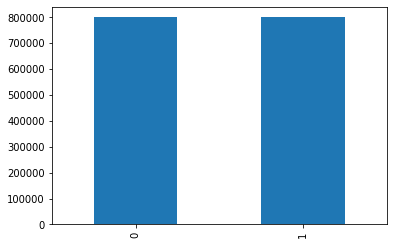

In [11]:
#第十一步 检查样本是否均衡
# check dataset balance
data['sentiment'].value_counts().plot(kind='bar')

In [12]:
#第十二步 线性SVM导致相对较低的测试分数。 这可能是由于推文无法进行二进制分类。 一条推文也可能是事实，也可能是中立的。

#深度学习：使用卷积神经网络的二进制情感分类器
#下载Google词嵌入
#正如Vikram在来宾演讲中解释的那样：

#“ Google使用News数据集（约1000亿个单词）训练了自己的词嵌入，并为300万个词生成了300维矢量。预先训练的300万个词嵌入可在此网站上公开获得。”
#下载Google使用News数据集
#!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" -O "GoogleNews-vectors-negative300.bin.gz"  # download Google's word embeddings
#!gunzip GoogleNews-vectors-negative300.bin.gz  # unzip downloaded word embeddings
#!ls -lah  # list files in current directoty

#使用Gensim库读取单词嵌入
#read word embeddings using the Gensim library
from gensim.models import KeyedVectors
#EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
EMBEDDING_FILE = '/Users/yangxiaojun/test/erfan/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)
# check this https://radimrehurek.com/gensim/models/word2vec.html
# binary = true is because the word2vec file we have has a bin suffix, if it's text file, binary = false
# key is the word, value is a 300 dimensional vector for each word

In [13]:
#13 由于Keras仅根据索引位置拆分训练/验证，因此最好使用SciKit learning，它可以随机分配拆分的样本
#Sklearn用于将数据拆分为训练（80％）和测试（20％）
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['content'], data['sentiment'], test_size=0.2, stratify=data['sentiment'])

#变量被重新格式化以用于tensorflow
x_train = x_train.values
y_train = keras.utils.to_categorical(y_train.values)
x_test = x_test.values
y_test=keras.utils.to_categorical(y_test.values)

#打印以检查变量的形状，两组都应包含正值和负值
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1280000,) (1280000, 2)
(320000,) (320000, 2)


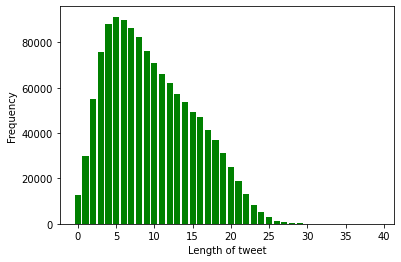

In [14]:
# 14绘制句子长度的频率
d = {}
for i,x in enumerate(x_train):
    n = sum([1 for w in x.split() if w in word2vec])
    if n in d: d[n] = d[n] + 1
    else: d[n] = 1
plt.bar(list(d.keys()), d.values(), color='g')
plt.xlabel('Length of tweet')
plt.ylabel('Frequency')
plt.show()

In [15]:
#15 Tensorflow标记化和填充
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(data['content'].values) 

# 填充序列最大长度= 50，因为最长的句子似乎在30左右
max_length = 50

# 定义词汇量 （统计词转换为索引）
vocab_size = len(tokenizer_obj.word_index) + 1

# 将每个文本转换为整数序列（稍后将在嵌入层中使用）
X_train_tokens =  tokenizer_obj.texts_to_sequences(x_train)
X_test_tokens = tokenizer_obj.texts_to_sequences(x_test)

# 附加零以使文本长度相同（使用“ pad_sequences”功能）
X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length)
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length)

In [16]:
#16 定义嵌入尺寸
EMBEDDING_DIM = 300

# create lookup table (matrix of Vocab x emb_dim)
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in tokenizer_obj.word_index.items():
    if word in word2vec.vocab:
        embedding_matrix[i] = word2vec.word_vec(word)

In [28]:
#17 训练模型 %%%%%%%%%%%%%%%%%%%%%%%%跳过
model = Sequential()

model.add(Embedding(vocab_size,EMBEDDING_DIM, input_length=max_length, dropout = 0.2))

model.add(LSTM(lstm_out, dropout_U = 0.2, dropout_W = 0.2,return_sequences=True))

model.add(Flatten())

model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

model.summary()

model.fit(x=X_train_pad, y=y_train, epochs=5, verbose=1, validation_data=(X_test_pad, y_test), shuffle=True, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=4, use_multiprocessing=True)

In [29]:
#17 训练模型 %%%%%%%%%%%%%%%%%%%%%%%%跳过
# 建立神经网络
model = keras.models.Sequential()

###嵌入层(只能作为第一层)
#我们要用深度学习模型处理文本数据，通过使用某种分词方法来实现文本向量化
#即在分词过程，把生成的标记与数值向量相关联，然后把这些向量组合成张量作为深度学习模型的输入
#embedding（词嵌入）方法就是一种把标记与数值向量相关联的方法。
#Embedding(词汇表的大小，词向量的维度，使用weights参数指明embedding初始值，输入序列的长度，将该层设置为不可训练的)
model.add(keras.layers.Embedding(vocab_size, EMBEDDING_DIM,
          weights=[embedding_matrix], input_length=max_length, trainable=False))

#dropout层
#为输入数据施加Dropout。Dropout将在训练过程中每次更新参数时按一定概率（rate）随机断开输入神经元，Dropout层用于防止过拟合。
#0.2 控制需要断开的神经元的比例
model.add(keras.layers.Dropout(0.2))

#一维卷积层
#因为是添加一维卷积层Conv1D()，一维卷积一般会处理时序数据
#所以，卷积核的宽度为1，而kernel_size就是卷积核的长度了，这样的意思就是这个卷积核是一个长方形的卷积核。
#Conv1D(输出维度，卷积核大小，激活函数)
model.add(keras.layers.Conv1D(32, 7, activation='relu'))
# 批标准化（归一化）
model.add(keras.layers.BatchNormalization())

#一维卷积层
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.BatchNormalization())

#一维卷积层
model.add(keras.layers.Conv1D(32, 3, activation='relu'))
model.add(keras.layers.BatchNormalization())

#对文本数据进行平均池化操作
model.add(keras.layers.GlobalAveragePooling1D())

#网络层
#Dense(神经元个数, 该层使用的激活函数)
model.add(keras.layers.Dense(2, activation='softmax'))

# 损失函数 亦称作对数损失，logloss
# RMSprop：该优化器通常是面对递归神经网络时的一个良好选择，除学习率可调整外，建议保持优化器的其他默认参数不变
# 评价函数用于评估当前训练模型的性能，评估方式，准确率
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(0.0002), metrics=['accuracy'])

#输出模型各层的参数状况
model.summary()

# 训练模型
#(输入，输出，训练模型迭代次数，日志展示【显示进度条】，用作验证集的训练数据的比例，是否在每轮迭代之前混洗数据，，一个epoch包含的步数，在验证集上的step总数，，最大线程数，是否用多线程)
model.fit(x=X_train_pad, y=y_train, epochs=5, verbose=1, validation_data=(X_test_pad, y_test), shuffle=True, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           95528100  
_________________________________________________________________
dropout (Dropout)            (None, 50, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 44, 32)            67232     
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 42, 32)            3104      
_________________________________________________________________
batch_normalization_1 (Batch (None, 42, 32)            128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 32)            3

In [30]:
#18 储存模型 %%%%%%%%%%%%%%%%%%%%%%%%跳过
from tensorflow.keras.models import load_model

model.save('/Users/yangxiaojun/test/erfan/Tweet_sentiment_model_lstm.h5')

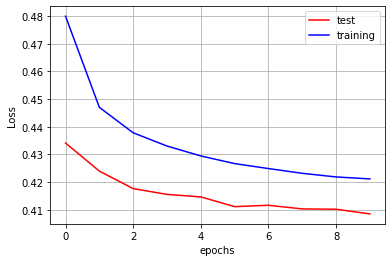

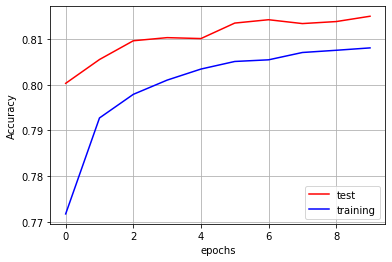

In [31]:
#19 Plot model accuracy and loss  %%%%%%%%%%%%%%%%%%%%%%%%跳过
def plot_accuracy_and_loss(model):
    epochs = model.history.params['epochs']
    epochs = range(epochs)
    val_loss = model.history.history['val_loss']
    val_accuracy = model.history.history['val_accuracy']
    training_loss = model.history.history['loss']
    training_accuracy = model.history.history['accuracy']

    plt.plot(epochs, val_loss, 'r', label='test')
    plt.plot(epochs, training_loss, 'b', label='training')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    plt.plot(epochs, val_accuracy, 'r', label='test')
    plt.plot(epochs, training_accuracy, 'b', label='training')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

plot_accuracy_and_loss(model)

In [ ]:
#20 运行模型

In [34]:
#使用训练有素的模型对股票的推文进行分类

In [18]:
# 21打印
df #print

,date,text,text_nohtml,cleancontent
0,2021-07-01 00:00:00,Chinese ride-hailing app Didi had a market deb...,Chinese ride-hailing app Didi had a market deb...,chinese ridehailing app didi had a market debu...
1,2021-07-01 00:00:00,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,detwilers 3 day flyer 4th of july 71217321 ch...
2,2021-07-01 00:00:00,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs hi guys young one ready stock ya bagi yg ...
3,2021-07-01 00:00:01,Phillies Mid-Week Stock Report: Strong Starter...,Phillies Mid-Week Stock Report: Strong Starter...,phillies midweek stock report strong starters ...
4,2021-07-01 00:00:03,BUT... I'd have to be right that the stock wil...,BUT... I'd have to be right that the stock wil...,but id have to be right that the stock will ta...
...,...,...,...,...
7395699,2021-12-31 23:59:45,@ImAvudaiappan Dravidian Stock clearance ?????...,@ImAvudaiappan Dravidian Stock clearance ?????...,imavudaiappan dravidian stock clearance
7395700,2021-12-31 23:59:50,Livermore's cylinder discovery is the holy gra...,Livermore's cylinder discovery is the holy gra...,livermores cylinder discovery is the holy grai...
7395701,2021-12-31 23:59:52,Ring in the new year with some new #dice maybe...,Ring in the new year with some new #dice maybe...,ring in the new year with some new dice maybe ...
7395702,2021-12-31 23:59:55,@wtfisthisapp10 He��s not a laughing stock though,@wtfisthisapp10 He��s not a laughing stock though,wtfisthisapp10 he��s not a laughing stock though


In [19]:
# 22 标记输入文本
pred_source = df['cleancontent'].str.lower().astype(str).values
pred_tokens =  tokenizer_obj.texts_to_sequences(pred_source)

# 填充输入文本的max_lenght值取自较早的单元格
pred_pad = pad_sequences(pred_tokens, maxlen=max_length)

In [21]:
# 23 将预测列添加到数据集并另存为csv
model_pred=model_loaded.predict(pred_pad)
dfp=pd.DataFrame(data=model_pred, columns=["p_negative_lstm","p_positive_lstm"])
df["p_negative_lstm"]=dfp["p_negative_lstm"]
df["p_positive_lstm"]=dfp["p_positive_lstm"]
df

,date,text,text_nohtml,cleancontent,p_negative_CNN1,p_positive_CNN1
0,2021-07-01 00:00:00,Chinese ride-hailing app Didi had a market deb...,Chinese ride-hailing app Didi had a market deb...,chinese ridehailing app didi had a market debu...,0.363743,0.636257
1,2021-07-01 00:00:00,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,detwilers 3 day flyer 4th of july 71217321 ch...,0.043013,0.956987
2,2021-07-01 00:00:00,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs hi guys young one ready stock ya bagi yg ...,0.213327,0.786673
3,2021-07-01 00:00:01,Phillies Mid-Week Stock Report: Strong Starter...,Phillies Mid-Week Stock Report: Strong Starter...,phillies midweek stock report strong starters ...,0.779437,0.220563
4,2021-07-01 00:00:03,BUT... I'd have to be right that the stock wil...,BUT... I'd have to be right that the stock wil...,but id have to be right that the stock will ta...,0.915706,0.084294
...,...,...,...,...,...,...
7395699,2021-12-31 23:59:45,@ImAvudaiappan Dravidian Stock clearance ?????...,@ImAvudaiappan Dravidian Stock clearance ?????...,imavudaiappan dravidian stock clearance,0.352234,0.647766
7395700,2021-12-31 23:59:50,Livermore's cylinder discovery is the holy gra...,Livermore's cylinder discovery is the holy gra...,livermores cylinder discovery is the holy grai...,0.093552,0.906448
7395701,2021-12-31 23:59:52,Ring in the new year with some new #dice maybe...,Ring in the new year with some new #dice maybe...,ring in the new year with some new dice maybe ...,0.143032,0.856968
7395702,2021-12-31 23:59:55,@wtfisthisapp10 He��s not a laughing stock though,@wtfisthisapp10 He��s not a laughing stock though,wtfisthisapp10 he��s not a laughing stock though,0.617631,0.382369


In [22]:
#24
df.to_csv('/Users/yangxiaojun/test/erfan/twitter_data/Twitter_lstm.csv')

In [23]:
df

,date,text,text_nohtml,cleancontent,p_negative_CNN1,p_positive_CNN1
0,2021-07-01 00:00:00,Chinese ride-hailing app Didi had a market deb...,Chinese ride-hailing app Didi had a market deb...,chinese ridehailing app didi had a market debu...,0.363743,0.636257
1,2021-07-01 00:00:00,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,Detwiler's 3 Day Flyer (4th of July) 7/1/21-7/...,detwilers 3 day flyer 4th of july 71217321 ch...,0.043013,0.956987
2,2021-07-01 00:00:00,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs! Hi guys Young One ready stock ya bagi yg...,ksfs hi guys young one ready stock ya bagi yg ...,0.213327,0.786673
3,2021-07-01 00:00:01,Phillies Mid-Week Stock Report: Strong Starter...,Phillies Mid-Week Stock Report: Strong Starter...,phillies midweek stock report strong starters ...,0.779437,0.220563
4,2021-07-01 00:00:03,BUT... I'd have to be right that the stock wil...,BUT... I'd have to be right that the stock wil...,but id have to be right that the stock will ta...,0.915706,0.084294
...,...,...,...,...,...,...
7395699,2021-12-31 23:59:45,@ImAvudaiappan Dravidian Stock clearance ?????...,@ImAvudaiappan Dravidian Stock clearance ?????...,imavudaiappan dravidian stock clearance,0.352234,0.647766
7395700,2021-12-31 23:59:50,Livermore's cylinder discovery is the holy gra...,Livermore's cylinder discovery is the holy gra...,livermores cylinder discovery is the holy grai...,0.093552,0.906448
7395701,2021-12-31 23:59:52,Ring in the new year with some new #dice maybe...,Ring in the new year with some new #dice maybe...,ring in the new year with some new dice maybe ...,0.143032,0.856968
7395702,2021-12-31 23:59:55,@wtfisthisapp10 He��s not a laughing stock though,@wtfisthisapp10 He��s not a laughing stock though,wtfisthisapp10 he��s not a laughing stock though,0.617631,0.382369
